## A "gentle" introduction to ipython3 and notebooks

In this notebook we will cover the basics of python programming as well as the features offered by the Jupyter notebook.

**Python** is a high-level, dynamic, object-oriented programming language. It is a general purpose language, which is designed to be easy to use and easy to read.

**IPython** (Interactive Python) is orignally developed for Python. Now, it is a command shell for interactive computing supporting multiple programming languages. It offers rich media, shell syntax, tab completion, and history. IPython is based on an architecture that provides parallel and distributed computing. IPython enables parallel applications to be developed, executed, debugged and monitored interactively.

**Jupyter Notebooks** are a web-based interactive computational environment for creating IPython notebooks. An IPython notebook is a JSON document containing an ordered list of input/output cells which can contain code, text, mathematics, plots and rich media. Notebooks make data analysis easier to perform, understand and reproduce. All laboratories in this course are prepared as Notebooks. As you can see, in this Notebook, we can put text, images, hyperlinks, source code... The Notebooks can be converted to a number of open standard output formats (HTML, HTML presentation slides, LaTeX, PDF, ReStructuredText, Markdown, Python) through File -> Download As in the web interface. In addition, Jupyter manages the notebooks' versions through a checkpoint mechanism. You can create checkpoint anytime via File -> Save and Checkpoint.

# 1. Notebook

## 1.1 Tab completion

Tab completion is a convenient way to explore the structure of any object you're dealing with. Simply type object_name.

In [1]:
s = "test function of tab completion"

# type s.<TAB> to see the suggestions

# Show your experiments working on a string. 
# Try splitting a string into its constituent words, and count the number of words.

In [2]:
# Exercise
s_split = s.split(" ")
print(s_split, len(s_split))

['test', 'function', 'of', 'tab', 'completion'] 5


## 1.2 Magic functions

IPython has a set of predefined magic functions that you can call with a command line style syntax. There are two types of magics, line-oriented and cell-oriented.

**Line magics** are prefixed with the `%` character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes.

**Cell magics** are prefixed with a double `%%`, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument.

In [3]:
%timeit range(1000)

272 ns ± 6.31 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
%%timeit x = range(10000)
max(x)

330 µs ± 5.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For more information, you can follow this [link](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb)

## 1.3 Debugging

Whenever an exception occurs, the call stack is printed out to help you to track down the true source of the problem. It is important to gain familiarity with the call stack, especially when using the PySpark API. 

In [5]:
for i in [4,3,2,0]:
    print(5/i)

1.25
1.6666666666666667
2.5


ZeroDivisionError: division by zero

In [6]:
for i in [4,3,2,0]:
    try:
        print(5/i)
    except:
        raise ZeroDivisionError("Your tried to divide 5 by 0")

1.25
1.6666666666666667
2.5


ZeroDivisionError: Your tried to divide 5 by 0

# 2. Python

When working with a small dataset (one that can comfortably fit into a single machine), Pandas and Matplotlib, together with Python are valid alternatives to other popular tools such as R and Matlab. Using such libraries allows to inherit from the simple and clear Python syntax, achieve very good performance, enjoy superior memory management, error handling, and good package management [[1]](http://ajminich.com/2013/06/22/9-reasons-to-switch-from-matlab-to-python/).


## 2.1 Syntax

(This section is for students who did not program in Python before. If you're familiar with Python, please move to the next section: 2.2. Numpy)

When working with Python, the code seems to be simpler than (many) other languages. In this laboratory, we compare the Python syntax to that of Java - another very common language.

```
//java syntax
int i = 10;
string s = "Technologies for BigData with Python";
System.out.println(i);
System.out.println(s);
// you must not forget the semicolon at the end of each sentence
```

In [7]:
# python syntax
i = 10
s = "Technologies for BigData with Python"
print(i)
print(s)
# forget about the obligation of commas

10
Technologies for BigData with Python


### Indentation & If-else syntax
In python, we don't use `{` and `}` to define blocks of codes: instead, we use indentation to do that. 
The code within the same block must have the same indentation. For example, in java, we write:

```
string language = "Python";

// the block is surrounded by { and }
// the condition is in ( and )
if (language == "Python") {
    int x = 1;
    x += 10;
       int y = 5; // a wrong indentation isn't problem
    y = x + y;
    System.out.println(x + y);

    // a statement is broken into two line
    x = y
        + y;

    // do some stuffs
}
else if (language == "Java") {
    // another block
}
else {
    // another block
}
```

In [8]:
language = "Python"
if language == "Python":
    x = 10
    x += 10
    y = 5 # all statements in the same block must have the same indentation
    y = (
        x + y
    ) # statements can be on multiple lines, using ( )
    print (x 
           + y)
    
    # statements can also be split on multiple lines by using \ at the END of each line
    x = y \
        + y
    
    # do some other stuffs
elif language == "Java":
    # another block
    pass
else:
    # another block
    pass

45


### Ternary conditional operator
In python, we often see ternary conditional operator, which is used to assign a value to a variable based on some condition. For example, in java, we write:

```
int x = 10;
// if x > 10, assign y = 5, otherwise, y = 15
int y = (x > 10) ? 5 : 15;

int z;
if (x > 10)
    z = 5; // it's not necessary to have { } when the block has only one statement
else
    z = 15;
```

Of course, although we can easily write these lines of code in an if else block to get the same result, people prefer ternary conditioinal operator because of simplicity.

In python, we write:

In [9]:
x = 10
# a very natural way
y = 5 if x > 10 else 15
print(y)

# another way
y = x > 10 and 5 or 15
print(y)

15
15


### Lists and For loops
Another syntax that we should revisit is the for loop. In java, we can write:

```
// init an array with 10 integer numbers
int[] array = new int[]{1, 2, 3, 4, 5, 6, 7, 8, 9, 10};
for (int i = 0; i < array.length; i++){
    // print the i-th element of array
    System.out.println(array[i]);
}
```

In Python, instead of using an index to help indicating an element, we can access the element directly:

In [10]:
array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Python has no built-in array data structure
# instead, it uses "list" which is much more general 
# and can be used as a multidimensional array quite easily.
for element in array:
    print(element)

1
2
3
4
5
6
7
8
9
10


In [11]:
for (index, element) in enumerate(array):
    print(index, element)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10


Actually, Python has no built-in array data structure. It uses the list data structure, which is much more general and can be used as a multidimensional array quite easily. In addtion, elements in a list can be retrieved in a very concise way. For example, we create a 2d-array with 4 rows. Each row has 3 elements.

In [12]:
# 2-dimentions array with 4 rows, 3 columns
twod_array = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
for index, row in enumerate(twod_array):
    print("row ", index, ":", row)

# print row 1 until row 3
print("row 1 until row 3: ", twod_array[1:3])

# all rows from row 2
print("all rows from row 2: ", twod_array[2:])

# all rows until row 2
print("all rows until row 2:", twod_array[:2])

# all rows from the beginning with step of 2. 
print("all rows from the beginning with step of 2:", twod_array[::2])

row  0 : [1, 2, 3]
row  1 : [4, 5, 6]
row  2 : [7, 8, 9]
row  3 : [10, 11, 12]
row 1 until row 3:  [[4, 5, 6], [7, 8, 9]]
all rows from row 2:  [[7, 8, 9], [10, 11, 12]]
all rows until row 2: [[1, 2, 3], [4, 5, 6]]
all rows from the beginning with step of 2: [[1, 2, 3], [7, 8, 9]]


### Dictionaries
Another useful data structure in Python is a dictionary, which we use to store (key, value) pairs. Here's some example usage of dictionaries:

In [13]:
d = {'key1': 'value1', 'key2': 'value2'}  # Create a new dictionary with some data
print(d['key1'])       # Get an entry from a dictionary; prints "value1"
print('key1' in d)     # Check if a dictionary has a given key; prints "True"
d['key3'] = 'value3'    # Set an entry in a dictionary
print(d['key3'])      # Prints "value3"
# print(d['key9'])  # KeyError: 'key9' not a key of d
print(d.get('key9', 'custom_default_value'))  # Get an element with a default; prints "custom_default_value"
print(d.get('key3', 'custom_default_value'))    # Get an element with a default; prints "value3"
del d['key3']        # Remove an element from a dictionary
print(d.get('key3', 'custom_default_value')) # "fish" is no longer a key; prints "custom_default_value"


value1
True
value3
custom_default_value
value3
custom_default_value


### Functions

In Python, we can define a function by using keyword def.

In [14]:
def square(x):
    return x*x

print(square(5))

25


You can apply a function to each element of a list/array by using lambda function. For example, we want to square elements in a list:

In [15]:
array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# apply function "square" on each element of "array"
print(list(map(lambda x: square(x), array)))

# or using a for loop, and a list comprehension
print([square(x) for x in array])

print("orignal array:", array)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
orignal array: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


These two above syntaxes are used very often.

If you are not familiar with list comprehensions, follow this [link](http://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html%5D).

We can also put a function B inside a function A (that is, we can have nested functions). In that case, function B is only accessed inside function A (the scope that it's declared). For example:

In [16]:
# select only the prime number in array
# and square them
def filterAndSquarePrime(arr):
    
    # a very simple function to check a number is prime or not
    def checkPrime(number):
        if (number <= 1): return False
        # if we find any divisor of "number" return false
        # we can improve this process by only finding divisors in range [2, sqrt(number)]
        for i in range(2, int(number/2) + 1):
            if number % i == 0:
                return False
        return True
    
    primeNumbers = filter(lambda x: checkPrime(x), arr)
    return map(lambda x: square(x), primeNumbers)

# we can not access checkPrime from here
# checkPrime(5)

result = filterAndSquarePrime(array)
list(result)

[4, 9, 25, 49]

### Importing modules, functions

Modules in Python are packages of code. Putting code into modules helps increasing the reusability and maintainability. The modules can be nested. To import a module, we simple use syntax: import <module_name>. Once it is imported, we can use any functions, classes inside it.

In [17]:
# import module 'math' to uses functions for calculating
import math

# print the square root of 16
print(math.sqrt(16))

# we can create alias when import a module
import numpy as np

print(np.sqrt(16))

4.0
4.0


Sometimes, you only need to import some functions inside a module to avoid loading the whole module into memory. To do that, we can use syntax: from <module> import <function>

In [18]:
# only import function 'sin' in package 'math'
from math import sin

# use the function
print(sin(60))

-0.3048106211022167


## ===> Your turn!

## Question 1

### 1.1

Write a function `checkSquareNumber` to check if a integer number is a square number or not. For example, 16 and 9 are square numbers. 15 isn't square number.
Requirements: - **Input**: an integer number - **Output**: `True` or `False`

*hint: if the square root of number x is an integer, then x is a square number*

In [19]:
import math

def checkSquareNumber(x):
    """
    Checks if an integer number is a square number.
    i.e. x = a^2, with a an integer number
    """
    root = math.sqrt(x)
    if round(root,0)==root: return True
    else: return False
    
print(checkSquareNumber(16), math.sqrt(16))
print(checkSquareNumber(250), math.sqrt(250))

True 4.0
False 15.811388300841896


### 1.2

A list list_numbers which contains the numbers from 1 to 9999 can be constructed from:

`list_numbers = range(0, 10000)`

Extract the square numbers in `list_numbers` using function `checkSquareNumber` from question 1.1. How many elements in the extracted list ?

In [20]:
list_numbers = range(0, 10000)
square_numbers = list(filter(checkSquareNumber, list_numbers))

print(square_numbers)
print(len(square_numbers))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]
100


### 1.3

Using array slicing, select the elements of the list square_numbers, whose index is from 5 to 20 (zero-based index).

In [21]:
print(square_numbers[5:21])

[25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]


## 2.2 Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

### 2.2.1. Array
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. Thanks to the same type property, Numpy has the benefits of locality of reference. Besides, many other Numpy operations are implemented in C, avoiding the general cost of loops in Python, pointer indirection and per-element dynamic type checking. So, the speed of Numpy is often faster than using built-in datastructure of Python. When working with massive data with computationally expensive tasks, you should consider to use Numpy.

The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [22]:
import numpy as np

# Create a rank 1 array
rank1_array = np.array([1, 2, 3])
print("type of rank1_array:", type(rank1_array))
print("shape of rank1_array:", rank1_array.shape)
print("elements in rank1_array:", rank1_array[0], rank1_array[1], rank1_array[2])

# Create a rank 2 array
rank2_array = np.array([[1,2,3],[4,5,6]])
print("shape of rank2_array:", rank2_array.shape)
print(rank2_array[0, 0], rank2_array[0, 1], rank2_array[1, 0])

type of rank1_array: <class 'numpy.ndarray'>
shape of rank1_array: (3,)
elements in rank1_array: 1 2 3
shape of rank2_array: (2, 3)
1 2 4


### 2.2.2. Array slicing
Similar to Python lists, numpy arrays can be sliced. The different thing is that you must specify a slice for each dimension of the array because arrays may be multidimensional.

In [23]:
import numpy as np
m_array = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

print(m_array[[0,1]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2
b = m_array[:2, 1:3]
print(b)

# we can only use this syntax with numpy array, not python list
print("value at row 0, column 1:", m_array[0, 1])

# Rank 1 view of the second row of m_array  
print("the second row of m_array:", m_array[1, :])

# print element at position (0,2) and (1,3)
print(m_array[[0,1], [2,3]])

[[1 2 3 4]
 [5 6 7 8]]
[[2 3]
 [6 7]]
value at row 0, column 1: 2
the second row of m_array: [5 6 7 8]
[3 8]


### 2.2.3. Boolean array indexing
We can use boolean array indexing to check whether each element in the array satisfies a condition or use it to do filtering.

In [24]:
m_array = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Find the elements of a that are bigger than 2
# this returns a numpy array of Booleans of the same
# shape as m_array, where each value of bool_idx tells
# whether that element of a is > 3 or not
bool_idx = (m_array > 3)
print(bool_idx , "\n")

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(m_array[bool_idx], "\n")

# We can combine two statements
print(m_array[m_array > 3], "\n")

# select elements with multiple conditions
print(m_array[(m_array > 3) & (m_array % 2 == 0)])


[[False False False  True]
 [ True  True  True  True]
 [ True  True  True  True]] 

[ 4  5  6  7  8  9 10 11 12] 

[ 4  5  6  7  8  9 10 11 12] 

[ 4  6  8 10 12]


### 2.2.4. Datatypes
Remember that the elements in a numpy array have the same type. When constructing arrays, Numpy tries to guess a datatype when you create an array However, we can specify the datatype explicitly via an optional argument.

In [25]:
# let Numpy guess the datatype
x1 = np.array([1, 2])
print(x1.dtype)

# force the datatype be float64
x2 = np.array([1, 2], dtype=np.float64)
print(x2.dtype)

int64
float64


### 2.2.5. Array math
Similar to Matlab or R, in Numpy, basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module.

In [26]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
# mathematical function is used as operator
print("x + y =", x + y, "\n")

# mathematical function is used as function
print("np.add(x, y)=", np.add(x, y), "\n")

# Unlike MATLAB, * is elementwise multiplication
# not matrix multiplication
print("x * y =", x * y , "\n")
print("np.multiply(x, y)=", np.multiply(x, y), "\n")
print("x*2=", x*2, "\n")

# to multiply two matrices, we use dot function
print("x.dot(y)=", x.dot(y), "\n")
print("np.dot(x, y)=", np.dot(x, y), "\n")

# Elementwise square root
print("np.sqrt(x)=", np.sqrt(x), "\n")

x + y = [[ 6.  8.]
 [10. 12.]] 

np.add(x, y)= [[ 6.  8.]
 [10. 12.]] 

x * y = [[ 5. 12.]
 [21. 32.]] 

np.multiply(x, y)= [[ 5. 12.]
 [21. 32.]] 

x*2= [[2. 4.]
 [6. 8.]] 

x.dot(y)= [[19. 22.]
 [43. 50.]] 

np.dot(x, y)= [[19. 22.]
 [43. 50.]] 

np.sqrt(x)= [[1.         1.41421356]
 [1.73205081 2.        ]] 



Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. In what follows, we work on a few more examples to reiterate the concept.

In [27]:
# declare two vectors
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors
print("v.dot(w)=", v.dot(w))
print("np.dot(v, w)=", np.dot(v, w))

# Matrix / vector product
print("x.dot(v)=", x.dot(v))
print("np.dot(x, v)=", np.dot(x, v))

# Matrix / matrix product
print("x.dot(y)=", x.dot(y))
print("np.dot(x, y)=", np.dot(x, y))

v.dot(w)= 219
np.dot(v, w)= 219
x.dot(v)= [29. 67.]
np.dot(x, v)= [29. 67.]
x.dot(y)= [[19. 22.]
 [43. 50.]]
np.dot(x, y)= [[19. 22.]
 [43. 50.]]


Additionally, we can do other aggregation computations on arrays such as `sum`, `nansum`, or `T`.

In [28]:
x = np.array([[1,2], [3,4]])

# Compute sum of all elements
print(np.sum(x))

# Compute sum of each column
print(np.sum(x, axis=0))

# Compute sum of each row
print(np.sum(x, axis=1))

# transpose the matrix
print(x.T)

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v.T)  # Prints "[1 2 3]"

10
[4 6]
[3 7]
[[1 3]
 [2 4]]
[1 2 3]


## ===> Your turn!

## Question 2

Given a 2D array:

```
 1  2  3  4
 5  6  7  8 
 9 10 11 12
13 14 15 16
```

### 2.1

Print the all odd numbers in this array using Boolean array indexing.

In [29]:
import numpy as np
array_numbers = np.array([
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 16]
    ])

print(array_numbers[array_numbers%2!=0])

[ 1  3  5  7  9 11 13 15]


### 2.2

Extract the second row and the third column in this array using array slicing.

In [30]:
print(array_numbers[1,:])
print(array_numbers[:,2])

[5 6 7 8]
[ 3  7 11 15]


### 2.3
Calculate the sum of diagonal elements.

In [31]:
sum_ = np.trace(array_numbers)

print(sum_)

34


### 2.4
Print elementwise multiplication of the first row and the last row using numpy's functions. Print the inner product of these two rows.

In [32]:
print(np.multiply(array_numbers[0,:],array_numbers[-1,:]))

print(np.dot(array_numbers[0,:],array_numbers[-1,:]))

[13 28 45 64]
150


## 2.3 Matplotlib

As its name indicates, Matplotlib is a plotting library. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. The most important function in matplotlib is plot, which allows you to plot 2D data.

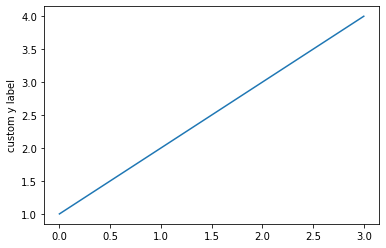

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('custom y label')
plt.show()

In this case, we provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for us. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3].

In the next example, we plot figure with both x and y data. Besides, we want to draw dashed lines instead of the solid in default.

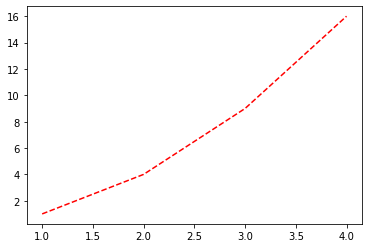

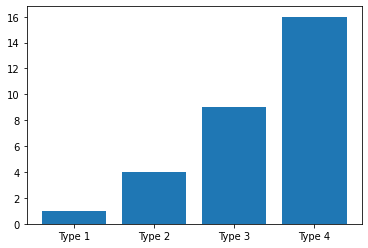

In [34]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r--')
plt.show()

plt.bar([1, 2, 3, 4], [1, 4, 9, 16], align='center')
# labels of each column bar
x_labels = ["Type 1", "Type 2", "Type 3", "Type 4"]
# assign labels to the plot
plt.xticks([1, 2, 3, 4], x_labels)

plt.show()

If we want to merge two figures into a single one, subplot is the best way to do that. For example, we want to put two figures in a stack vertically, we should define a grid of plots with 2 rows and 1 column. Then, in each row, a single figure is plotted.

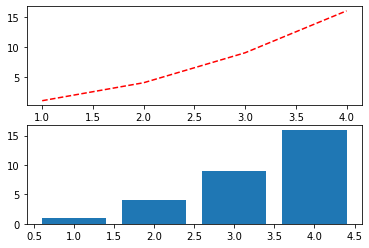

In [35]:
# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r--')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.bar([1, 2, 3, 4], [1, 4, 9, 16])

plt.show()

For more examples, please visit the [homepage](http://matplotlib.org/1.5.1/examples/index.html) of Matplotlib.

## ==> Your turn

## Question 3

Given a list of numbers from 0 to 9999.

### Question 3.1

Calculate the histogram of numbers divisible by 3, 7, 11 in the list respectively.
( Or in other word, how many numbers divisible by 3, 7, 11 in the list respectively ?


In [36]:
def divisor(array):
    output = [0,0,0]
    for elem in array:
        if elem%3==0:
            output[0]+=1
        if elem%7==0:
            output[1]+=1
        if elem%11==0:
            output[2]+=1
    return output

arr = np.array(range(0,10000))
divisors = divisor(arr)

print(divisors)

#histogram = plt.bar(['3','7','11'], divisors)
#plt.show()

[3334, 1429, 910]


### Question 3.2
Plot the histogram in a line chart.

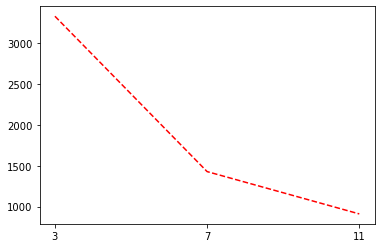

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(['3','7','11'], divisors, 'r--')

### Question 3.3
Plot the histogram in a bar chart.

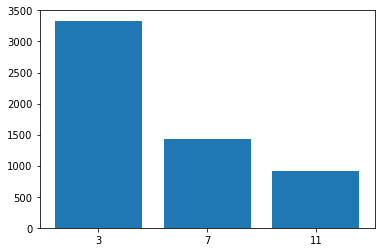

In [38]:
histogram = plt.bar(['3','7','11'], divisors)
plt.show()

## 2.4. Pandas
Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Indeeed, it is great for data manipulation, data analysis, and data visualization.

### 2.4.1. Data structures
Pandas introduces two useful (and powerful) structures: `Series` and `DataFrame`, both of which are built on top of `NumPy`.

**Series**

A `Series` is a one-dimensional object similar to an array, list, or even column in a table. It assigns a labeled index to each item in the `Series`. By default, each item will receive an index label from `0` to `N-1`, where `N` is the number items of Series.

We can create a `Series` by passing a list of values, and let pandas create a default integer index.

In [39]:
import pandas as pd
import numpy as np

# create a Series with an arbitrary list
s = pd.Series([3, 'Machine learning', 1.414259, -65545, 'Happy coding!'])
print(s)

0                   3
1    Machine learning
2             1.41426
3              -65545
4       Happy coding!
dtype: object


Or, an `index` can be used explixitly when creating the `Series`.

In [40]:
s = pd.Series([3, 'Machine learning', 1.414259, -65545, 'Happy coding!'],
             index=['Col1', 'Col2', 'Col3', 4.1, 5])
print(s)

Col1                   3
Col2    Machine learning
Col3             1.41426
4.1               -65545
5          Happy coding!
dtype: object


A `Series` can be constructed from a dictionary too.

In [41]:
s = pd.Series({
        'Col1': 3, 'Col2': 'Machine learning', 
        'Col3': 1.414259, 4.1: -65545, 
        5: 'Happy coding!'
    })
print(s)

Col1                   3
Col2    Machine learning
Col3             1.41426
4.1               -65545
5          Happy coding!
dtype: object


We can access items in a `Series` in a same way as `Numpy`.

In [42]:
s = pd.Series({
        'Col1': 3, 'Col2': -10, 
        'Col3': 1.414259, 
        4.1: -65545, 
        5: 8
    })

# get element which has index='Col1'
print("s['Col1']=", s['Col1'], "\n")

# use boolean indexing for selection
print(s[s > 0], "\n")

# modify elements on the fly using boolean indexing
s[s > 0] = 15

print(s, "\n")

# mathematical operations can be done using operators and functions.
print(s*10,  "\n")
print(np.square(s), "\n")

s['Col1']= 3.0 

Col1    3.000000
Col3    1.414259
5       8.000000
dtype: float64 

Col1       15.0
Col2      -10.0
Col3       15.0
4.1    -65545.0
5          15.0
dtype: float64 

Col1       150.0
Col2      -100.0
Col3       150.0
4.1    -655450.0
5          150.0
dtype: float64 

Col1    2.250000e+02
Col2    1.000000e+02
Col3    2.250000e+02
4.1     4.296147e+09
5       2.250000e+02
dtype: float64 



**DataFrame**

A `DataFrame` is a tablular data structure comprised of rows and columns, akin to database table, or R's data.frame object. In a loose way, we can also think of a `DataFrame` as a group of `Series` objects that share an `index` (the column names).

We can create a `DataFrame` by passing a `dict` of objects that can be converted to series-like.

In [43]:
data = {'year': [2013, 2014, 2015, 2013, 2014, 2015, 2013, 2014],
        'team': ['Manchester United', 'Chelsea', 'Asernal', 'Liverpool', 'West Ham', 'Newcastle', 'Machester City', 'Tottenham'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2013,Manchester United,11,5
1,2014,Chelsea,8,8
2,2015,Asernal,10,6
3,2013,Liverpool,15,1
4,2014,West Ham,11,5
5,2015,Newcastle,6,10
6,2013,Machester City,10,6
7,2014,Tottenham,4,12


We can store data as a CSV file, or read data from a CSV file

In [44]:
# save data to a csv file without the index
football.to_csv('football.csv', index=False)

from_csv = pd.read_csv('football.csv')
from_csv.head()

,year,team,wins,losses
0,2013,Manchester United,11,5
1,2014,Chelsea,8,8
2,2015,Asernal,10,6
3,2013,Liverpool,15,1
4,2014,West Ham,11,5


To read a `CSV` file with a custom delimiter between values and custom columns' names, we can use parameters `sep` and `names` relatively. Moreover, Pandas also supports to read and write to `Excel file` , `sqlite` database file, URL, or even clipboard.

We can have an overview on the data by using functions `info` and `describe`.

In [45]:
print(football.info(), "\n")
football.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    8 non-null      int64 
 1   team    8 non-null      object
 2   wins    8 non-null      int64 
 3   losses  8 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 384.0+ bytes
None 



,year,wins,losses
count,8.000000,8.000000,8.000000
mean,2013.875000,9.375000,6.625000
std,0.834523,3.377975,3.377975
min,2013.000000,4.000000,1.000000
25%,2013.000000,7.500000,5.000000
50%,2014.000000,10.000000,6.000000
75%,2014.250000,11.000000,8.500000
max,2015.000000,15.000000,12.000000


Numpy's regular slicing syntax works as well.

In [46]:
print(football[0:2], "\n")

# show only the teams that have won more than 10 matches from 2014
print(football[(football.year >= 2014) & (football.wins >= 10)])

   year               team  wins  losses
0  2013  Manchester United    11       5
1  2014            Chelsea     8       8 

   year      team  wins  losses
2  2015   Asernal    10       6
4  2014  West Ham    11       5


An important feature that Pandas supports is `JOIN`. Very often, the data comes from multiple sources, in multiple files. For example, we have 2 CSV files, one contains the information of Artists, the other contains information of Songs. If we want to query the artist name and his/her corresponding songs, we have to do joining two dataframe.

Similar to `SQL`, in Pandas, you can do `inner join`, `left outer join`, `right outer join` and `full outer join`. Let's see a small example. Assume that we have two dataset of singers and songs. The relationship between two datasets is maintained by a constrain on `singer_code`.

In [47]:
singers = pd.DataFrame({'singer_code': range(5), 
                           'singer_name': ['singer_a', 'singer_b', 'singer_c', 'singer_d', 'singer_e']})
songs = pd.DataFrame({'singer_code': [2, 2, 3, 4, 5], 
                           'song_name': ['song_f', 'song_g', 'song_h', 'song_i', 'song_j']})
print(singers)
print('\n')
print(songs)

   singer_code singer_name
0            0    singer_a
1            1    singer_b
2            2    singer_c
3            3    singer_d
4            4    singer_e


   singer_code song_name
0            2    song_f
1            2    song_g
2            3    song_h
3            4    song_i
4            5    song_j


In [48]:
# inner join
pd.merge(singers, songs, on='singer_code', how='inner')

,singer_code,singer_name,song_name
0,2,singer_c,song_f
1,2,singer_c,song_g
2,3,singer_d,song_h
3,4,singer_e,song_i


In [49]:
# left join
pd.merge(singers, songs, on='singer_code', how='left')

,singer_code,singer_name,song_name
0,0,singer_a,NaN
1,1,singer_b,NaN
2,2,singer_c,song_f
3,2,singer_c,song_g
4,3,singer_d,song_h
5,4,singer_e,song_i


In [50]:
# right join
pd.merge(singers, songs, on='singer_code', how='right')

,singer_code,singer_name,song_name
0,2,singer_c,song_f
1,2,singer_c,song_g
2,3,singer_d,song_h
3,4,singer_e,song_i
4,5,NaN,song_j


In [51]:
# outer join (full join)
pd.merge(singers, songs, on='singer_code', how='outer')

,singer_code,singer_name,song_name
0,0,singer_a,NaN
1,1,singer_b,NaN
2,2,singer_c,song_f
3,2,singer_c,song_g
4,3,singer_d,song_h
5,4,singer_e,song_i
6,5,NaN,song_j


We can also concat two dataframes vertically or horizontally via function `concat` and parameter `axis`. This function is useful when we need to append two similar datasets or to put them side by site



In [52]:
# concat vertically
pd.concat([singers, songs], sort=True)

,singer_code,singer_name,song_name
0,0,singer_a,NaN
1,1,singer_b,NaN
2,2,singer_c,NaN
3,3,singer_d,NaN
4,4,singer_e,NaN
0,2,NaN,song_f
1,2,NaN,song_g
2,3,NaN,song_h
3,4,NaN,song_i
4,5,NaN,song_j


In [53]:
# concat horizontally
pd.concat([singers, songs], axis=1)

,singer_code,singer_name,singer_code,song_name
0,0,singer_a,2,song_f
1,1,singer_b,2,song_g
2,2,singer_c,3,song_h
3,3,singer_d,4,song_i
4,4,singer_e,5,song_j


When computing descriptive statistic, we usually need to aggregate data by each group. For example, to anwser the question "how many songs each singer has?", we have to group data by each singer, and then calculate the number of songs in each group. Not that the result must contain the statistic of all singers in database (even if some of them have no song)

In [54]:
data = pd.merge(singers, songs, on='singer_code', how='left')

# count the values of each column in group
print(data.groupby('singer_code').count())

print("\n")

# count only song_name
print(data.groupby('singer_code').song_name.count())

print("\n")

# count song name but ignore duplication, and order the result
print(data.groupby('singer_code').song_name.nunique().sort_values(ascending=True))

             singer_name  song_name
singer_code                        
0                      1          0
1                      1          0
2                      2          2
3                      1          1
4                      1          1


singer_code
0    0
1    0
2    2
3    1
4    1
Name: song_name, dtype: int64


singer_code
0    0
1    0
3    1
4    1
2    2
Name: song_name, dtype: int64


## ==> Your Turn

## Question 4
We have two datasets about music: [song](data/song.tsv) and [album](data/album.tsv).

In the following questions, you have to use Pandas to load data and write code to answer these questions.

### Question 4.1
Load both dataset into two dataframes and print the information of each dataframe.
Unpack the additional `data.zip` into a folder `data/` where your notebook resides.

**HINT** The dataset can be load by using function `read_table`. For example: `df = pd.read_table(url, sep='\t')`

In [55]:
import pandas as pd

songdb_url = 'data/song.tsv'
albumdb_url = 'data/album.tsv'
song_df = pd.read_table(songdb_url,sep='\t')
album_df = pd.read_table(albumdb_url,sep='\t')

In [56]:
song_df.describe()

,Album
count,9.000000
mean,3.666667
std,2.061553
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,7.000000


In [57]:
album_df.describe()

,Album code,Year
count,7.000000,7.000000
mean,4.000000,2000.000000
std,2.160247,12.819256
min,1.000000,1982.000000
25%,2.500000,1990.500000
50%,4.000000,2001.000000
75%,5.500000,2011.000000
max,7.000000,2014.000000


### Question 4.2

How many albums in this datasets ?

How many songs in this datasets ?



In [58]:
print("number of albums:", len(album_df['Album code'].unique()))
print("number of songs:", len(song_df['Song'].unique()))

number of albums: 7
number of songs: 10


### Question 4.3
How many distinct singers in this dataset ?


In [59]:
print("number distinct singers:", len(song_df['Singer'].unique()))

number distinct singers: 2


### Question 4.4
Is there any song that doesn't belong to any album ?
Is there any album that has no song ?

**HINT**
  * To join two datasets on different key names, we use left_on= and right_on= instead of on=.
  * Funtion `notnull()` and `isnull()` help determining the value of a column is missing or not. 

In [60]:
fulldf = pd.merge(song_df, album_df, how='outer', left_on='Album', right_on='Album code')
fulldf

,Singer,Song,Album,Length,Album code,Album name,Year
0,Michael Jackson,2 bad,1.0,4:07,1.0,"HIStory: Past, Present and Future, Book I",1995.0
1,Michael Jackson,Unbreakable,2.0,6:26,2.0,Invincible,2001.0
2,Michael Jackson,Don't Walk Away,2.0,4:25,2.0,Invincible,2001.0
3,Michael Jackson,Break of Dawn,2.0,5:33,2.0,Invincible,2001.0
4,Taylor Swift,All Too Well,5.0,5:29,5.0,Red,2012.0
5,Taylor Swift,Bad Blood,7.0,3:19,7.0,1989,2014.0
6,Taylor Swift,Back to December,6.0,4:54,6.0,Speak Now,2010.0
7,Michael Jackson,Human Nature,4.0,4:06,4.0,Thriller,1982.0
8,Michael Jackson,Baby Be Mine,4.0,4:20,4.0,Thriller,1982.0
9,Michael Jackson,What More Can I Give,NaN,3:36,NaN,NaN,NaN


In [61]:
song_without_album=fulldf[fulldf['Album code'].isnull()]
song_without_album['Song']

9    What More Can I Give
Name: Song, dtype: object

In [62]:
album_without_song=fulldf[fulldf['Song'].isnull()]
album_without_song['Album name']

10    Bad
Name: Album name, dtype: object